# Feedforward Neural Network
This notebook implements a simple yet effective FNN model.

In [2]:
# Installazione di tutti i pacchetti necessari
!pip install numpy pandas matplotlib scikit-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 133.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 173.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 182.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.0 MB/s eta 0:00:00


## 1. Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [4]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 2. Load Pre-processed Data

In [5]:
X_train_scaled = pd.read_csv('X_train_scaled.csv').values
y_train = pd.read_csv('y_train.csv').values
X_test_scaled = pd.read_csv('X_test_scaled.csv').values
y_test = pd.read_csv('y_test.csv').values

## 3. Build Feedforward Neural Network

In [152]:
def build_fnn_model(input_dim, learning_rate=0.001):
    """
    Build a Feedforward Neural Network

    Args:
        input_dim: Number of input features
        learning_rate: Learning rate for optimizer

    Returns:
        Compiled Keras model
    """

    # Input processing
    Dense(256, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.5),

    # Core processing
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Refinement
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),

    # Output
    Dense(1, activation='linear')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.Huber(delta=1.0),
        metrics=['mae', 'mse']
    )
    return model


In [148]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Add, Activation
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

def build_residual_fnn(input_dim, learning_rate=0.001):
    inputs = Input(shape=(input_dim,))

    # First block
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Residual block 1
    residual = x
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])  # Skip connection
    x = Dropout(0.3)(x)

    # Residual block 2
    x = Dense(128)(x)
    residual = x
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Dropout(0.3)(x)

    # Residual block 3
    x = Dense(128)(x)
    residual = x
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Dropout(0.2)(x)

    # Residual block 4
    x = Dense(128)(x)
    residual = x
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Dropout(0.2)(x)

    # Residual block 5
    x = Dense(128)(x)
    residual = x
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Dropout(0.2)(x)

    # Output
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer = AdamW(learning_rate=1e-3, weight_decay=1e-5),
        loss=tf.keras.losses.Huber(delta=1.0),
        metrics=['mae', 'mse']
    )
    return model

## 4. Setup Callbacks

In [153]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'checkpoint/best_fnn_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

## 5. Train the Model

In [154]:
input_dim = X_train_scaled.shape[1]

model = build_fnn_model(input_dim, learning_rate=0.001)
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_193"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_280 (Dense)   │ (None, 256)       │      2,816 │ input_layer_19[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_280[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_226         │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_281 (Dense)   │ (None, 256)       │     65,792 │ dropout_226[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_281[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_227         │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_282 (Dense)   │ (None, 256)       │     65,792 │ dropout_227[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_282[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_63 (Add)        │ (None, 256)       │          0 │ batch_normalizat… │
│                     │                   │            │ dropout_226[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_228         │ (None, 256)       │          0 │ add_63[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_283 (Dense)   │ (None, 128)       │     32,896 │ dropout_228[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_46       │ (None, 128)       │          0 │ dense_283[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ activation_46[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_229         │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_284 (Dense)   │ (None, 128)       │     16,512 │ dropout_229[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_284[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_64 (Add)        │ (None, 128)       │          0 │ batch_normalizat… │
│                     │                   │            │ dense_283[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 298,369 (1.14 MB)

 Trainable params: 294,785 (1.12 MB)

 Non-trainable params: 3,584 (14.00 KB)

None


In [155]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

Epoch 1/100
1108/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7123 - mae: 7.0327 - mse: 228.2390
Epoch 1: val_loss improved from inf to 6.12316, saving model to checkpoint/best_fnn_model.h5


1112/1112 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 6.7118 - mae: 7.0323 - mse: 228.2025 - val_loss: 6.1232 - val_mae: 6.4289 - val_mse: 213.6092 - learning_rate: 0.0010
Epoch 2/100
1111/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6624 - mae: 6.9810 - mse: 225.6653
Epoch 2: val_loss did not improve from 6.12316
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.6622 - mae: 6.9808 - mse: 225.6509 - val_loss: 6.2954 - val_mae: 6.6044 - val_mse: 225.4302 - learning_rate: 0.0010
Epoch 3/100
1109/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6990 - mae: 7.0253 - mse: 225.3457
Epoch 3: val_loss improved from 6.12316 to 5.49866, saving model to checkpoint/best_fnn_model.h5


1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.6986 - mae: 7.0249 - mse: 225.3250 - val_loss: 5.4987 - val_mae: 5.7732 - val_mse: 165.6358 - learning_rate: 0.0010
Epoch 4/100
1106/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6636 - mae: 6.9862 - mse: 226.1295
Epoch 4: val_loss did not improve from 5.49866
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.6632 - mae: 6.9857 - mse: 226.0874 - val_loss: 6.0193 - val_mae: 6.3250 - val_mse: 205.4298 - learning_rate: 0.0010
Epoch 5/100
1110/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4837 - mae: 6.8066 - mse: 216.8737
Epoch 5: val_loss did not improve from 5.49866
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.4837 - mae: 6.8066 - mse: 216.8672 - val_loss: 5.8468 - val_mae: 6.1352 - val_mse: 201.8022 - learning_rate: 0.0010
Epoch 6/100
1102/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6432 - mae: 6.9681 - mse: 225.3838
Epoch 6: val_loss did not improve from 5.49866
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6

1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5.8491 - mae: 6.1563 - mse: 189.4181 - val_loss: 5.4378 - val_mae: 5.7066 - val_mse: 187.4416 - learning_rate: 2.5000e-04
Epoch 16/100
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8528 - mae: 6.1590 - mse: 191.0770
Epoch 16: val_loss did not improve from 5.43782
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.8527 - mae: 6.1590 - mse: 191.0719 - val_loss: 5.5169 - val_mae: 5.7940 - val_mse: 189.6627 - learning_rate: 2.5000e-04
Epoch 17/100
1099/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8691 - mae: 6.1751 - mse: 191.7059
Epoch 17: val_loss did not improve from 5.43782
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5.8685 - mae: 6.1744 - mse: 191.6478 - val_loss: 5.6378 - val_mae: 5.9067 - val_mse: 197.6029 - learning_rate: 2.5000e-04
Epoch 18/100
1105/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8634 - mae: 6.1703 - mse: 191.6257
Epoch 18: val_loss did not improve from 5.43782
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 

1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.6588 - mae: 5.9600 - mse: 184.0240 - val_loss: 5.4109 - val_mae: 5.6961 - val_mse: 183.2706 - learning_rate: 1.2500e-04
Epoch 24/100
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7045 - mae: 6.0050 - mse: 185.8671
Epoch 24: val_loss did not improve from 5.41088
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.7045 - mae: 6.0049 - mse: 185.8615 - val_loss: 5.7009 - val_mae: 5.9754 - val_mse: 195.5533 - learning_rate: 1.2500e-04
Epoch 25/100
1109/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6852 - mae: 5.9858 - mse: 186.3685
Epoch 25: val_loss did not improve from 5.41088
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.6849 - mae: 5.9856 - mse: 186.3433 - val_loss: 5.5629 - val_mae: 5.8378 - val_mse: 191.9646 - learning_rate: 1.2500e-04
Epoch 26/100
1099/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6207 - mae: 5.9218 - mse: 181.7845
Epoch 26: val_loss improved from 5.41088 to 5.35508, saving model to checkpoint/be

1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.6201 - mae: 5.9213 - mse: 181.7346 - val_loss: 5.3551 - val_mae: 5.6341 - val_mse: 181.6453 - learning_rate: 1.2500e-04
Epoch 27/100
1104/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6207 - mae: 5.9217 - mse: 183.5751
Epoch 27: val_loss did not improve from 5.35508
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.6203 - mae: 5.9214 - mse: 183.5405 - val_loss: 5.4184 - val_mae: 5.6884 - val_mse: 184.9629 - learning_rate: 1.2500e-04
Epoch 28/100
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6226 - mae: 5.9216 - mse: 182.5075
Epoch 28: val_loss did not improve from 5.35508
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.6226 - mae: 5.9215 - mse: 182.5035 - val_loss: 5.5761 - val_mae: 5.8585 - val_mse: 191.4546 - learning_rate: 1.2500e-04
Epoch 29/100
1111/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6206 - mae: 5.9208 - mse: 181.3167
Epoch 29: val_loss did not improve from 5.35508
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 

1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.5164 - mae: 5.8138 - mse: 178.2103 - val_loss: 5.3542 - val_mae: 5.6215 - val_mse: 182.8265 - learning_rate: 1.5625e-05
Epoch 43/100
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5270 - mae: 5.8228 - mse: 179.9412
Epoch 43: val_loss improved from 5.35418 to 5.31139, saving model to checkpoint/best_fnn_model.h5


1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.5269 - mae: 5.8227 - mse: 179.9350 - val_loss: 5.3114 - val_mae: 5.5762 - val_mse: 180.5180 - learning_rate: 1.5625e-05
Epoch 44/100
1109/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5636 - mae: 5.8601 - mse: 179.2995
Epoch 44: val_loss did not improve from 5.31139
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.5633 - mae: 5.8598 - mse: 179.2808 - val_loss: 5.3841 - val_mae: 5.6510 - val_mse: 183.6553 - learning_rate: 1.5625e-05
Epoch 45/100
1107/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5424 - mae: 5.8393 - mse: 178.6390
Epoch 45: val_loss did not improve from 5.31139
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.5418 - mae: 5.8387 - mse: 178.5990 - val_loss: 5.3664 - val_mae: 5.6347 - val_mse: 183.7053 - learning_rate: 1.5625e-05
Epoch 46/100
1111/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5028 - mae: 5.7996 - mse: 177.4337
Epoch 46: val_loss did not improve from 5.31139
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 

KeyboardInterrupt: 

In [95]:
import os
output_dir = "R-4.88"  #
os.makedirs(output_dir, exist_ok=True)

## 6. Training Visualization

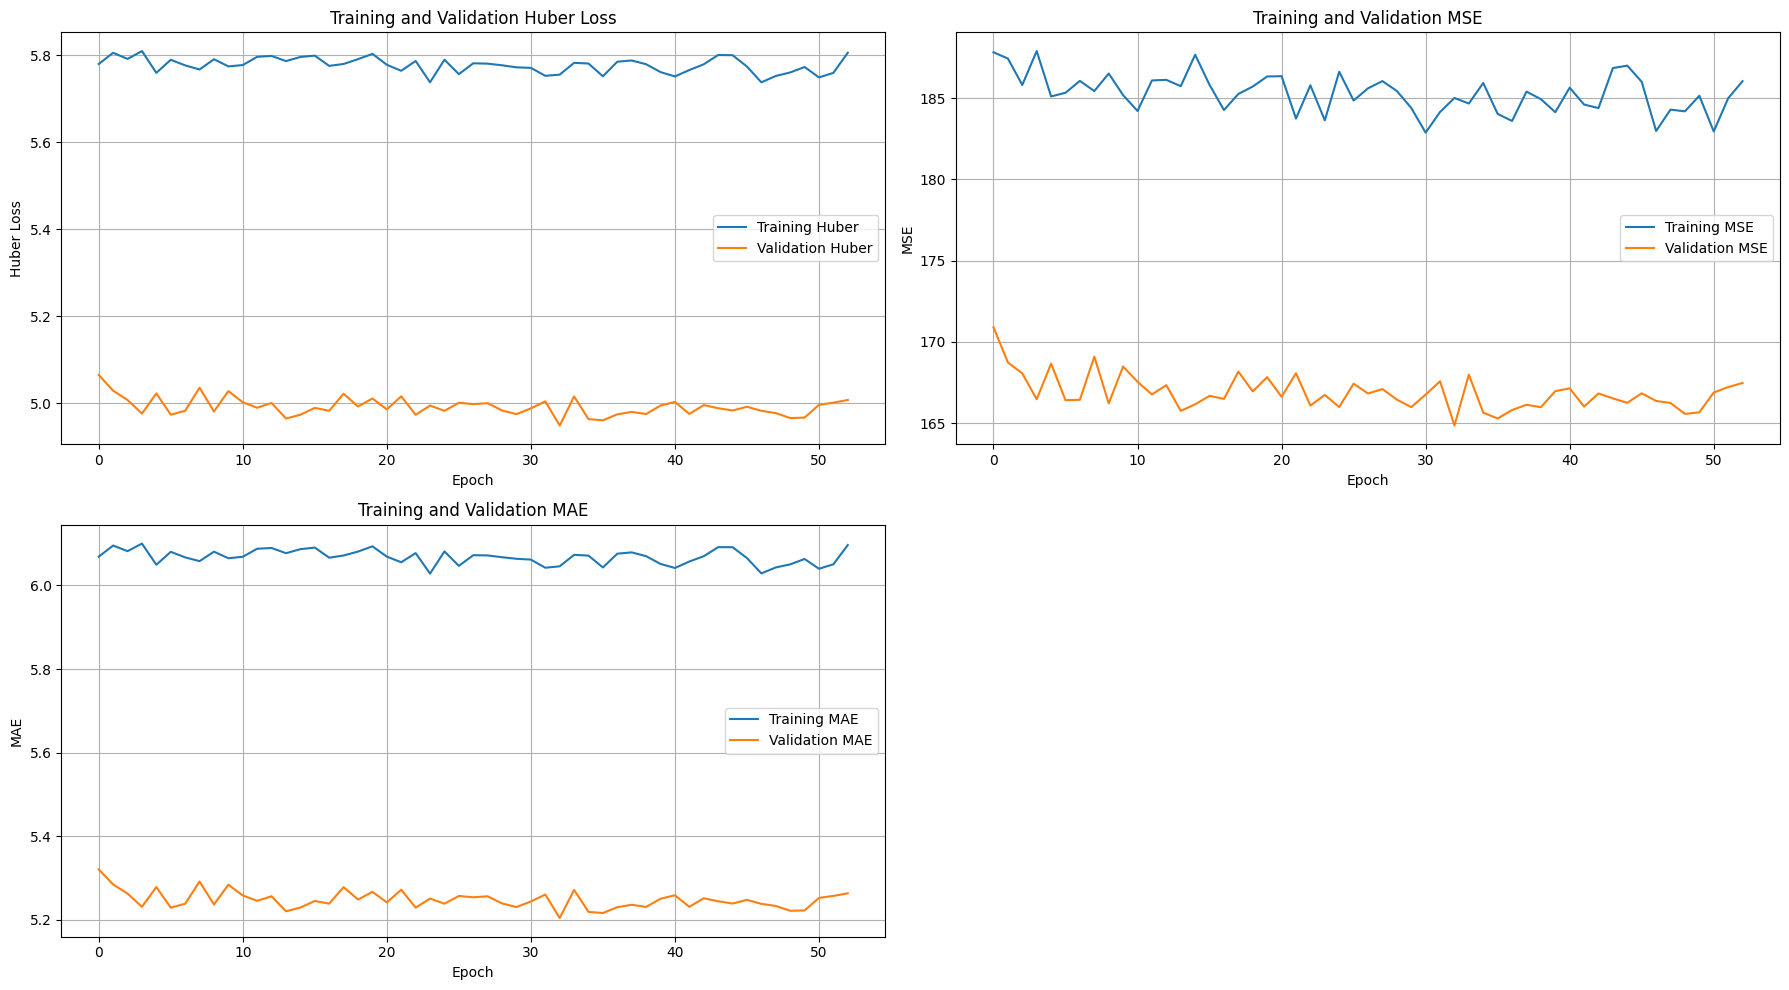

In [138]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # 2 rows, 2 columns

# Huber Loss curves
axes[0, 0].plot(history.history['loss'], label='Training Huber')
axes[0, 0].plot(history.history['val_loss'], label='Validation Huber')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Huber Loss')
axes[0, 0].set_title('Training and Validation Huber Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# MSE curves
axes[0, 1].plot(history.history['mse'], label='Training MSE')
axes[0, 1].plot(history.history['val_mse'], label='Validation MSE')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('Training and Validation MSE')
axes[0, 1].legend()
axes[0, 1].grid(True)

# MAE curves
axes[1, 0].plot(history.history['mae'], label='Training MAE')
axes[1, 0].plot(history.history['val_mae'], label='Validation MAE')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Training and Validation MAE')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Hide the unused subplot (bottom right)
axes[1, 1].axis('off')

plt.tight_layout()
#plt.savefig(output_dir+'/fnn_training.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Evaluate the Model

In [97]:
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# Custom accuracy within tolerance
tolerance = 0.10  # 10% tolerance

# Training metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)


# Testing metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)


report = []
report.append("="*60)
report.append("FEEDFORWARD NEURAL NETWORK - RESULTS")
report.append("="*60)
report.append("\nTraining Set:")
report.append(f"  MSE:  {train_mse:.4f}")
report.append(f"  RMSE: {train_rmse:.4f}")
report.append(f"  MAE:  {train_mae:.4f}")
report.append(f"  R²:   {train_r2:.4f}")
report.append("\nTest Set:")
report.append(f"  MSE:  {test_mse:.4f}")
report.append(f"  RMSE: {test_rmse:.4f}")
report.append(f"  MAE:  {test_mae:.4f}")
report.append(f"  R²:   {test_r2:.4f}")
report.append("="*60)

report_text = "\n".join(report)

print("\n" + report_text)
report_path = os.path.join(output_dir, "fnn_test_results.txt")
with open(report_path, "w") as f:
    f.write(report_text)

1390/1390 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step

FEEDFORWARD NEURAL NETWORK - RESULTS

Training Set:
  MSE:  155.8407
  RMSE: 12.4836
  MAE:  5.3644
  R²:   0.8940

Test Set:
  MSE:  172.4256
  RMSE: 13.1311
  MAE:  5.4215
  R²:   0.8441


Plotting Evaluation

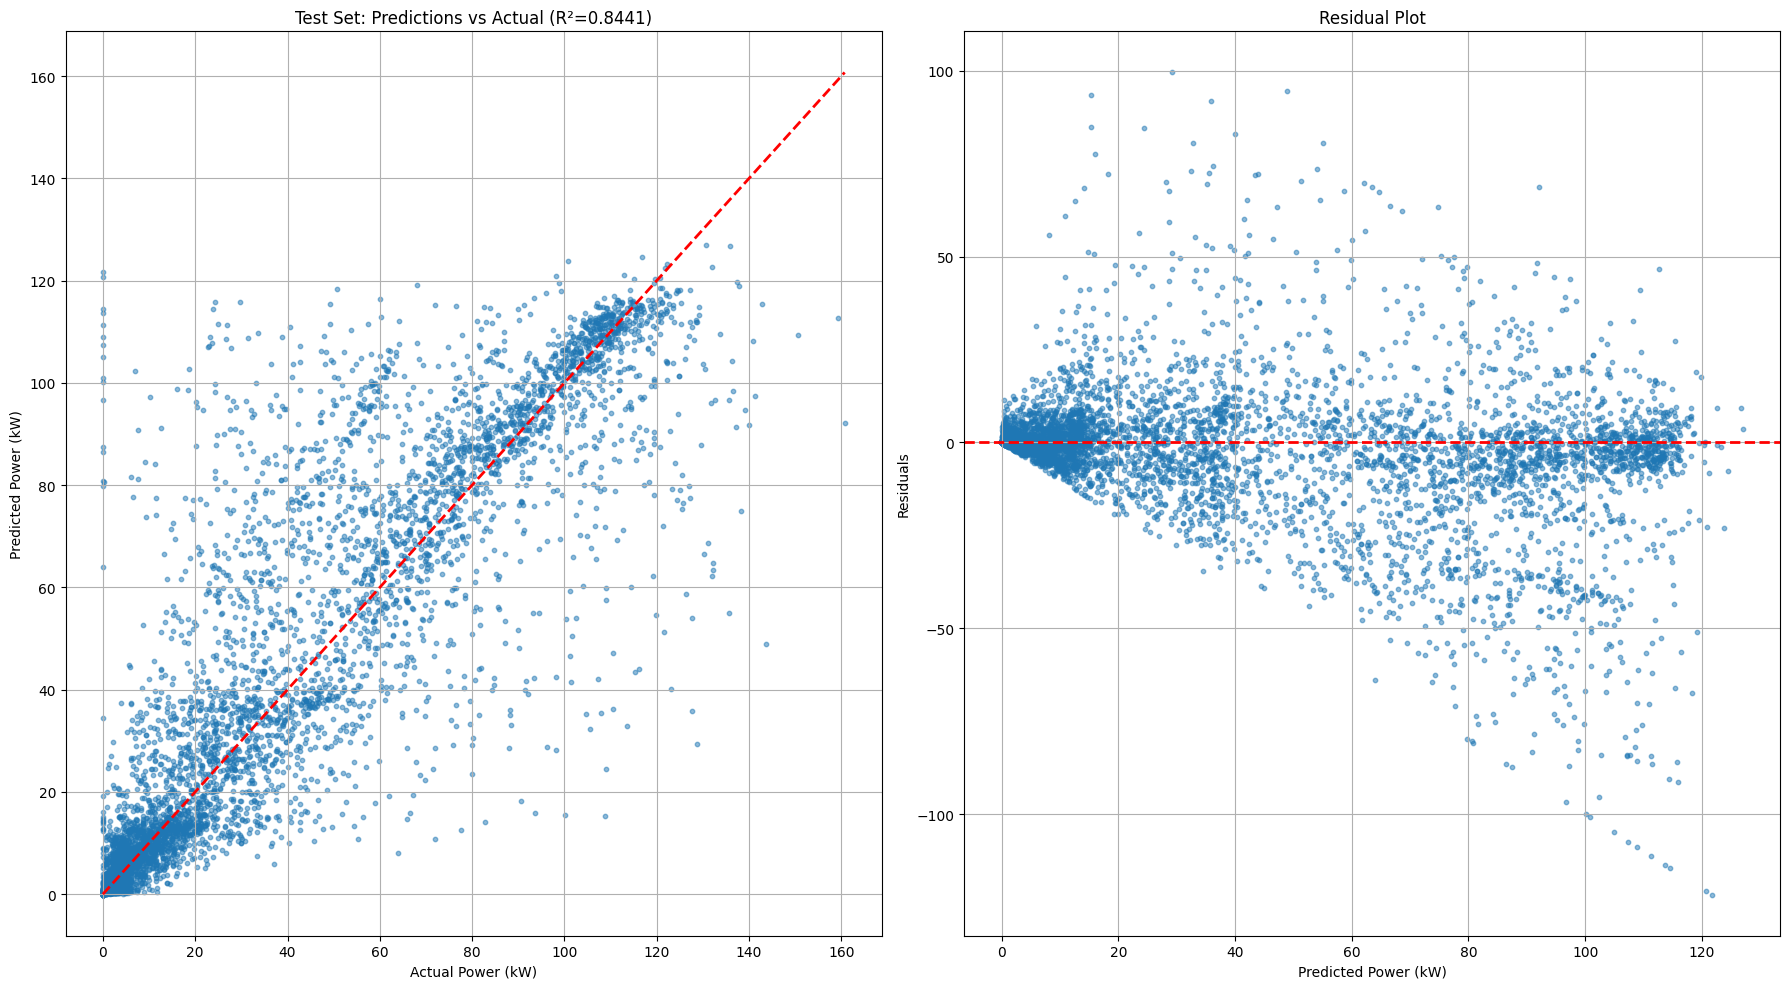

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # 1 rows, 2 columns

# Predictions vs Actual (Test Set)
axes[0].scatter(y_test, y_pred_test, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Power (kW)')
axes[0].set_ylabel('Predicted Power (kW)')
axes[0].set_title(f'Test Set: Predictions vs Actual (R²={test_r2:.4f})')
axes[0].grid(True)

# Residuals plot
y_test_flat = y_test.flatten()
y_pred_test_flat = y_pred_test.flatten()
residuals = y_test_flat - y_pred_test_flat
axes[1].scatter(y_pred_test_flat, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Power (kW)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True)

plt.tight_layout()
plt.savefig(output_dir + '/fnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Save the Model

In [101]:
model.save(output_dir + '/fnn_solar_final.h5')
print("\nModel saved as 'fnn_solar_final.h5'")
# Open a file in write mode
with open(output_dir + "/model_summary.txt", "w") as f:
    model.summary(print_fn=lambda x: f.write(x + "\n"))


Model saved as 'fnn_solar_final.h5'
